<a href="https://colab.research.google.com/github/chamod-nimsara2004/ai_modls_for_fun/blob/main/Handwritten_Digit_Recognition_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow Version: 2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded 60000 images for training.
Loaded 10000 images for testing.
Image shape: (28, 28)
New image shape: (28, 28, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Training ---
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.8872 - loss: 0.3813 - val_accuracy: 0.9845 - val_loss: 0.0490
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9837 - loss: 0.0536 - val_accuracy: 0.9882 - val_loss: 0.0365
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.9889 - loss: 0.0333 - val_accuracy: 0.9895 - val_loss: 0.0312
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9890 - val_loss: 0.0346
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.9940 - loss: 0.0186 - val_accuracy: 0.9903 - val_loss: 0.0333
--- Training Finished ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9875 - loss: 0.0420

Test Accuracy: 99.03%

--- Making a Prediction ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Model's raw predictions: [[8.2407353e-10 1.0393667e-09 1.6179671e-08 2.1225235e-07 1.1805885e-09
  1.4792185e-11 3.3140723e-14 9.9999809e

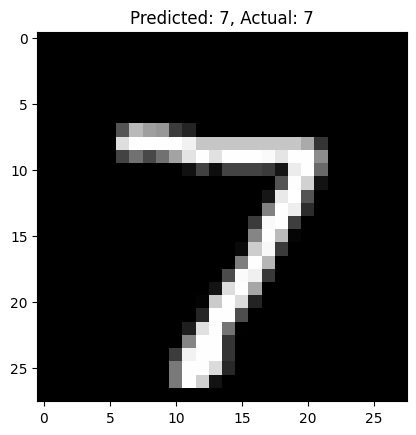

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

print(f"TensorFlow Version: {tf.__version__}")

# --- 1. Load the MNIST Dataset ---
# Keras provides the MNIST dataset built-in.
# x_train/x_test are the images (the "problem")
# y_train/y_test are the labels (the "answer", e.g., "5", "7")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Loaded {len(x_train)} images for training.")
print(f"Loaded {len(x_test)} images for testing.")
print(f"Image shape: {x_train[0].shape}") # Images are 28x28 pixels

# --- 2. Preprocess the Data ---
# Models train best when pixel values are normalized from 0.0 to 1.0,
# instead of 0 to 255.
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add a "channel" dimension. Grayscale images have 1 channel.
# (60000, 28, 28) -> (60000, 28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f"New image shape: {x_train[0].shape}")

# --- 3. Build the AI Model (The "Identification Modal") ---
# We will build a Convolutional Neural Network (CNN),
# which is the standard for image recognition.

model = keras.Sequential([
    # Input layer. Specify the shape of one image.
    keras.Input(shape=(28, 28, 1)),

    # Convolutional Layer: Learns 32 different "filters" (features)
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),

    # Pooling Layer: Shrinks the image to focus on important features
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Another Conv/Pool pair to learn more complex features
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten: Turns the 2D image data into a 1D list
    layers.Flatten(),

    # A "Dense" (standard) layer with 128 neurons
    layers.Dense(128, activation="relu"),

    # Output Layer: 10 neurons, one for each digit (0-9).
    # "softmax" gives a probability for each digit.
    layers.Dense(10, activation="softmax")
])

# Show a summary of the model we just built
model.summary()

# --- 4. Compile the Model ---
# Tell the model how to learn
model.compile(
    optimizer="adam",  # A good, all-purpose optimizer
    loss="sparse_categorical_crossentropy", # Best for "digit 0", "digit 1", etc.
    metrics=["accuracy"] # We want to see how accurate it is
)

# --- 5. Train the Model ---
print("\n--- Starting Training ---")
# This is where the model "learns" by looking at all the images.
# An "epoch" is one full pass over the entire training dataset.
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=5, # 5 epochs is a good start
    validation_data=(x_test, y_test) # Test against unseen data
)
print("--- Training Finished ---")

# --- 6. Evaluate the Model ---
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# --- 7. Make a Prediction ---
print("\n--- Making a Prediction ---")
# Let's take the first image from the test set
image_to_test = x_test[0]
label_of_image = y_test[0]

# Add a "batch" dimension (models expect batches of images)
# (28, 28, 1) -> (1, 28, 28, 1)
image_for_prediction = np.expand_dims(image_to_test, 0)

# Get the model's prediction
predictions = model.predict(image_for_prediction)

# The prediction is an array of 10 probabilities
print(f"Model's raw predictions: {predictions}")

# Find the digit with the highest probability
predicted_digit = np.argmax(predictions[0])

print(f"\nModel predicted: {predicted_digit}")
print(f"Actual label was: {label_of_image}")

# Show the image so you can see it for yourself
plt.figure()
plt.imshow(np.squeeze(image_to_test), cmap="gray")
plt.title(f"Predicted: {predicted_digit}, Actual: {label_of_image}")
plt.show()